# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Azzan Dwi Riski
- **Email:** azzandwiriski145@gmail.com
- **ID Dicoding:** azzandr

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda per bulan pada tahun 2011 dan 2012?
- Bagaimana pola peminjaman sepeda berdasarkan musim (season)?
- Bagaimana korelasi antara cuaca (weathersit) dan jumlah peminjaman sepeda?
- Bagaimana distribusi peminjaman sepeda untuk pengguna casual dan pengguna terdaftar?
- Bagaimana jumlah peminjaman pada pagi, siang, sore, dan malam hari?

## Import Semua Packages/Library yang Digunakan

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load day table

In [370]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load hour table

In [371]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing `day_df` data

In [372]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


 Jumlah data pada `day_df` telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [373]:
print("Number of duplications: ", day_df.duplicated().sum())
day_df.describe()

Number of duplications:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi atau keanehan nilai pada `day_df`. 

#### Assessing `hour_df` data

In [374]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mirip dengan `day_df` sebelumnya, `hour_df` juga tidak memiliki missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [375]:
print("Number of duplications: ", hour_df.duplicated().sum())
hour_df.describe()

Number of duplications:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Di sini juga terlihat bahwa tidak ada duplikasi ataupun keanehan dalam ringkasan parameter statistik dari  `hour_df`. 

Sampai tahap ini, masalahnya hanya ada pada kesalahan tipe data untuk kolom `dteday`. Namun, ada sebagian nama kolom dan nilai yang masih sulit dipahami. Masalah ini akan dibersihkan di proses selanjutnya.

### Cleaning Data

Hal-hal yang akan saya lakukan pada tahap pembersihan data diantaranya:
- Mengubah nama kolom yr, mnth, hr, dan cnt dengan format yang lebih mudah dibaca
- Mengubah tipe data pada kolom dteday menjadi datetime
- Mengubah tipe kolom season, yr, mnth, dan weathersit menjadi tipe kategorik
- Mengubah nilai kolom season, yr, mnth, dan weathersit agar lebih mudah dianalisa
- Menambahkan kolom hour_group untuk mengelompokkan jam (morning, afternoon, evening, night)

#### Rename columns

In [376]:
# Mengubah nama kolom yr, mnth, hr, weathersit dan cnt dengan format yang lebih mudah dibaca
day_df.rename(columns={'yr':'year', 'mnth':'month', 'weathersit':'weather_situation', 'cnt':'total_count'}, inplace=True)
hour_df.rename(columns={'yr':'year', 'mnth':'month', 'hr':'hour', 'weathersit':'weather_situation', 'cnt':'total_count'}, inplace=True)

#### Change columns data type

In [377]:
# Mengubah tipe data pada kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengubah tipe kolom season, yr, mnth, dan weathersit menjadi tipe kategorik
categorical_cols = ['season', 'year', 'month', 'weather_situation']
for col in categorical_cols:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

#### Change columns values

In [378]:
# Season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)
day_df['season'] = day_df['season'].map(season_mapping)

# Year
year_mapping = {0: '2011', 1: '2012'}
hour_df['year'] = hour_df['year'].map(year_mapping)
day_df['year'] = day_df['year'].map(year_mapping)

# Month
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
hour_df['month'] = hour_df['month'].map(month_mapping)
day_df['month'] = day_df['month'].map(month_mapping)

# Weather Situation
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'}
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)
day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)

#### Add `hour_group` columns
- Morning 5 am to 11 pm.
- Afternoon 12 pm to 4 pm.
- Evening 5 pm to 9 pm.
- Night 10 pm to 4 am.

In [379]:
# Menambahkan kolom hour_group untuk mengelompokkan jam
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

hour_df['hour_group'] = hour_df['hour'].apply(categorize_hour)

#### Re-Check the data

In [380]:
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,6,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,0,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [381]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   dteday             731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weather_situation  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  hum                731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

In [382]:
hour_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,total_count,hour_group
0,1,2011-01-01,Spring,2011,Jan,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,Night
1,2,2011-01-01,Spring,2011,Jan,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,Night
2,3,2011-01-01,Spring,2011,Jan,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,Night
3,4,2011-01-01,Spring,2011,Jan,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,Night
4,5,2011-01-01,Spring,2011,Jan,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,Night


In [383]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   dteday             17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   workingday         17379 non-null  int64         
 9   weather_situation  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  hum                17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

Sampai tahap ini, data sudah selesai dibersihkan. Tahap selanjutnya, data yang sudah dibersihkan ini akan dianalisis.

## Exploratory Data Analysis (EDA)

### Data Exploration `day_df`

#### Explore rentals per year

In [384]:
day_df.groupby(by='year', observed=False).agg({
    'total_count': ['sum', 'max', 'min', 'mean', 'std']
}, observed=False)

total_count                                     
             sum   max  min         mean          std
year                                                 
2011     1243103  6043  431  3405.761644  1378.753666
2012     2049576  8714   22  5599.934426  1788.667868

Jika diperhatikan, jumlah rental sepeda pada tahun 2012 jauh lebih tinggi dengan rata-rata harian sekitar 5600 rental. Ini artinya, ada peningkatan performa rental sepeda pada tahun 2012 dibandingkan tahun sebelumnya.

#### Explore rentals per month

In [385]:
day_df.groupby(by=['year', 'month'], observed=False).agg({
    'total_count': ['sum', 'max', 'min', 'mean']
}, observed=False)


total_count                         
                   sum   max   min         mean
year month                                     
2011 Jan         38189  1985   431  1231.903226
     Feb         48215  2927  1005  1721.964286
     Mar         64045  3239   605  2065.967742
     Apr         94870  5312   795  3162.333333
     May        135821  5805  2633  4381.322581
     Jun        143512  5515  3767  4783.733333
     Jul        141341  6043  3285  4559.387097
     Aug        136691  5895  1115  4409.387097
     Sep        127418  5423  1842  4247.266667
     Oct        123511  5511   627  3984.225806
     Nov        102167  4486  1495  3405.566667
     Dec         87323  3940   705  2816.870968
2012 Jan         96744  4521  1301  3120.774194
     Feb        103137  5062  1529  3556.448276
     Mar        164875  8362  3194  5318.548387
     Apr        174224  7460  1027  5807.466667
     May        195865  8294  2843  6318.225806
     Jun        202830  8120  4127  6761.000000
     Jul        203607  8173  4459  6567.967742
     Aug        214503  7865  4549  6919.451613
     Sep        218573  8714  4073  7285.766667
     Oct        198841  8156    22  6414.225806
     Nov        152664  6852  2277  5088.800000
     Dec        123713  6606   441  3990.741935

Secara umum, peminjaman sepeda lebih tinggi di tahun 2012 dibandingkan dengan tahun 2011 untuk setiap bulannya.

#### Explore rentals per user type

In [386]:
# Numbers of bike sharing per user type
day_df.groupby(by='year', observed=False).agg({
    'registered': ['sum'],
    'casual': ['sum']
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Jumlah rental sepeda oleh pengguna terdaftar (registered) jauh lebih tinggi daripada jumlah rental oleh pengguna casual pada kedua tahun (2011 dan 2012)

#### Explore rentals by season

In [387]:
# Print Numbers of bike sharing by season per year
print("Numbers of bike sharing by season per year:")
print(day_df.groupby(by=['year', 'season'], observed=False)['total_count'].sum())

# Print Total bike sharing by season
print("\nTotal bike sharing by season")
print(day_df.groupby(by='season', observed=False)['total_count'].sum().sort_values(ascending=False))

Numbers of bike sharing by season per year:
year  season
2011  Spring    150000
      Summer    347316
      Fall      419650
      Winter    326137
2012  Spring    321348
      Summer    571273
      Fall      641479
      Winter    515476
Name: total_count, dtype: int64

Total bike sharing by season
season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: total_count, dtype: int64


Rental sepeda tertinggi terjadi pada musim gugur (fall), dengan total sebanyak 1,061,129 rental. Musim panas (summer) juga memiliki jumlah rental sepeda yang tinggi, dengan total 918,589 rental. Sedangkan rental sepeda paling rendah terjadi pada musim semi, dengan total 471,348 rental. 

### Data Exploration `hour_df`

#### Explore rentals by parts of the day

In [388]:
hour_df.groupby(by='hour_group', observed=False)['total_count'].sum().sort_values(ascending=False)

hour_group
Evening      1163416
Afternoon     955882
Morning       921580
Night         251801
Name: total_count, dtype: int64

Kelompok jam rental sepeda paling tinggi terjadi pada Evening, dengan total rental sepeda mencapai 1.163.416.
Diikuti oleh Afternoon dengan jumlah rental sepeda sebanyak 955.882. Jam-jam Morning memiliki jumlah rental sepeda yang sedikit lebih rendah dibandingkan dengan afternoon, dengan total 921.580 rental. Rental sepeda pada jam Night memiliki jumlah yang paling rendah, yaitu sebanyak 251.801 rental.

#### Explore rentals by weather

In [389]:
hour_df.groupby(by='weather_situation', observed=False)['total_count'].sum().sort_values(ascending=False)

weather_situation
Clear             2338173
Misty              795952
Light_RainSnow     158331
Heavy_RainSnow        223
Name: total_count, dtype: int64

Cuaca yang cerah (Clear) memiliki jumlah peminjaman sepeda yang paling tinggi, diikuti oleh cuaca berkabut (Mist). Sementara itu, saat cuaca sangat buruk seperti hujan deras atau salju lebat (Heavy Rain/Snow), jumlah peminjaman sepeda sangat rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda per bulan pada tahun 2011 dan 2012?

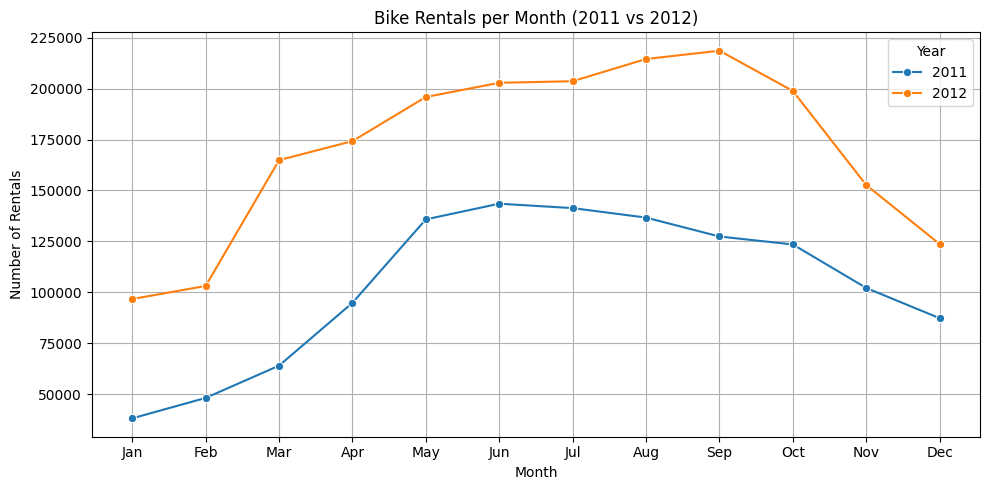

In [390]:
# Grouping data
rentals_per_month = day_df.groupby(by=['year', 'month'], observed=False)['total_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=rentals_per_month, x='month', y='total_count', hue='year', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.title('Bike Rentals per Month (2011 vs 2012)')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Pada tahun 2011, jumlah rental cenderung mengalami kenaikan sejak awal tahun, dan mencapai puncaknya pada bulan juni, kemudian mulai berangsur turun pada bulan july hingga akhir tahun. Pada tahun 2012, jumlah rental mengalami peningkatan tajam di bulan maret dan terus meningkat sampai bulan september, sebelum turun kembali di bulan-bulan berikutnya.

### Pertanyaan 2: Bagaimana pola peminjaman sepeda berdasarkan musim (season)?

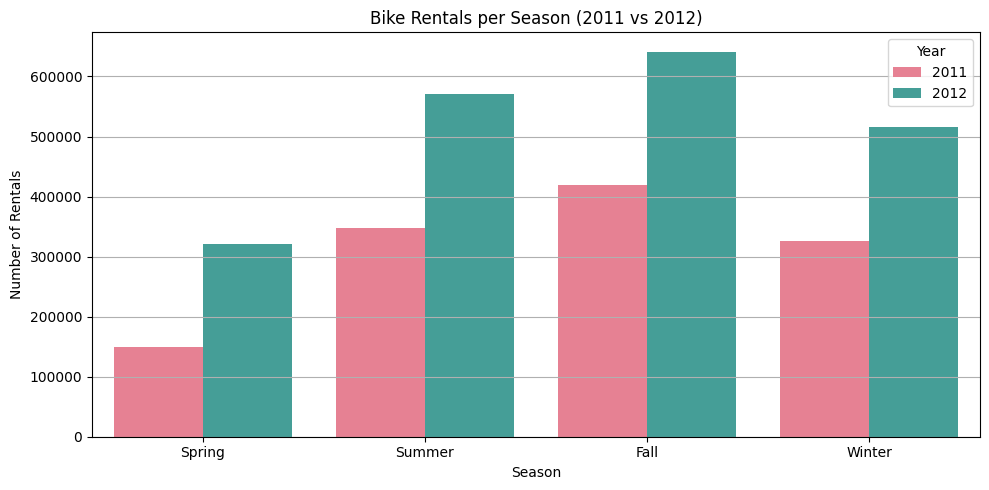

In [391]:
# Grouping data
rentals_per_season = day_df.groupby(by=['year', 'season'], observed=False)['total_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=rentals_per_season, x='season', y='total_count', hue='year', palette='husl')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.title('Bike Rentals per Season (2011 vs 2012)')
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Terdapat pola tahunan yang konsisten di mana peminjaman sepeda cenderung meningkat dari musim panas hingga musim gugur, mencapai puncaknya di musim gugur, kemudian menurun kembali di musim dingin dan mencapai titik terendah di musim semi. Pola ini terjadi baik pada tahun 2011 maupun 2012.

### Pertanyaan 3: Bagaimana korelasi antara cuaca (weathersit) dan jumlah peminjaman sepeda?

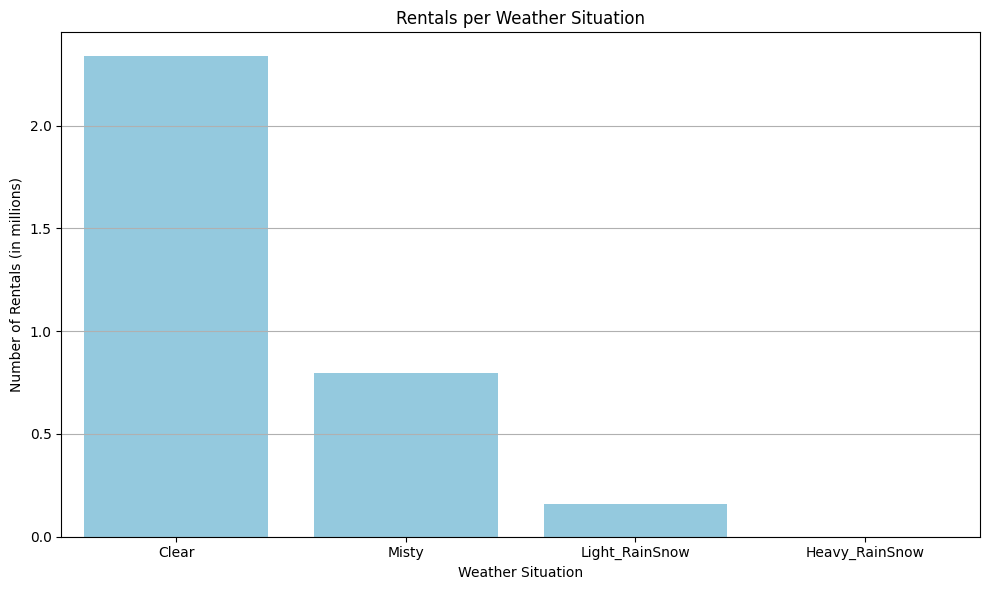

In [392]:
rentals_per_weather = hour_df.groupby(by='weather_situation', observed=False)['total_count'].sum()/1_000_000

plt.figure(figsize=(10, 6))
sns.barplot(data=rentals_per_weather, color='skyblue')

plt.xlabel('Weather Situation')
plt.ylabel('Number of Rentals (in millions)')
plt.title('Rentals per Weather Situation')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


Cuaca berpengaruh signifikan terhadap jumlah peminjaman sepeda, cuaca yang lebih cerah cenderung meningkatkan jumlah peminjaman, sementara cuaca yang buruk cenderung mengurangi jumlah peminjaman.

### Pertanyaan 4: Bagaimana distribusi peminjaman sepeda untuk pengguna casual dan pengguna terdaftar?

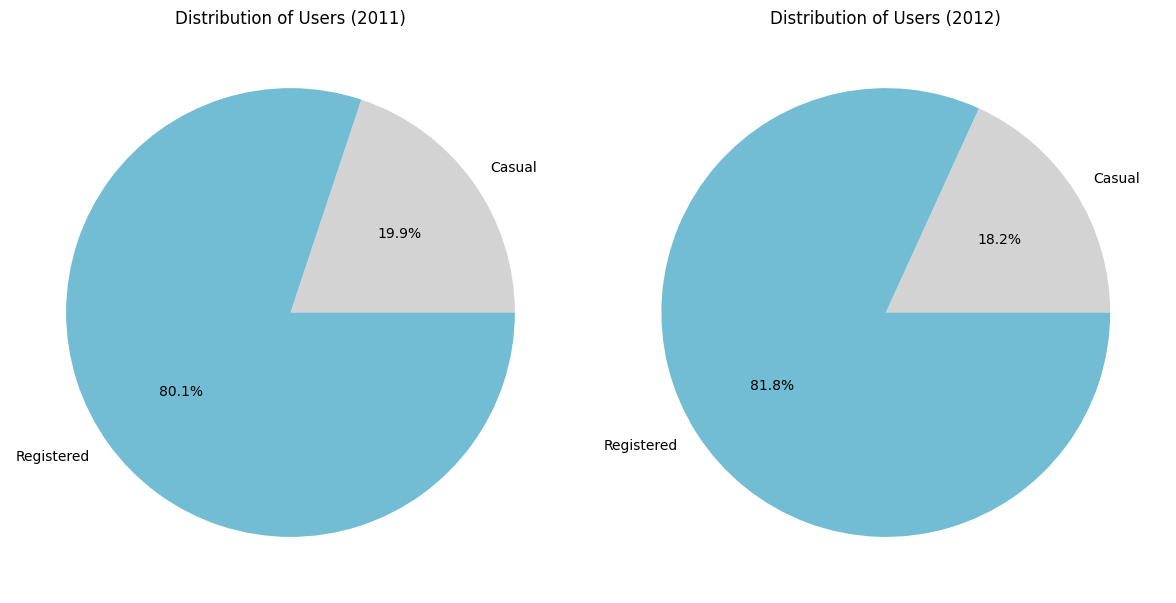

In [393]:
# Mengelompokkan data berdasarkan tahun dan menghitung total pengguna kasual dan terdaftar
user_type_totals = day_df.groupby('year', observed=False)[['casual', 'registered']].sum()

# Membuat data untuk diagram pie tahun 2011
data_2011 = user_type_totals.loc['2011']
labels = ['Casual', 'Registered']

# Membuat data untuk diagram pie tahun 2012
data_2012 = user_type_totals.loc['2012']

# Membuat dua subplot untuk diagram pie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Membuat pie plot tahun 2011
ax1.pie(data_2011, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])
ax1.set_title('Distribution of Users (2011)')

# Membuat pie plot tahun 2012
ax2.pie(data_2012, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])
ax2.set_title('Distribution of Users (2012)')

# Menampilkan diagram pie
plt.tight_layout()
plt.show()


Jumlah peminjam terbanyak berasal dari pengguna terdaftar, baik di tahun 2011 ataupun 2012.

### Pertanyaan 5: Bagaimana jumlah peminjaman pada pagi, siang, sore, dan malam hari?

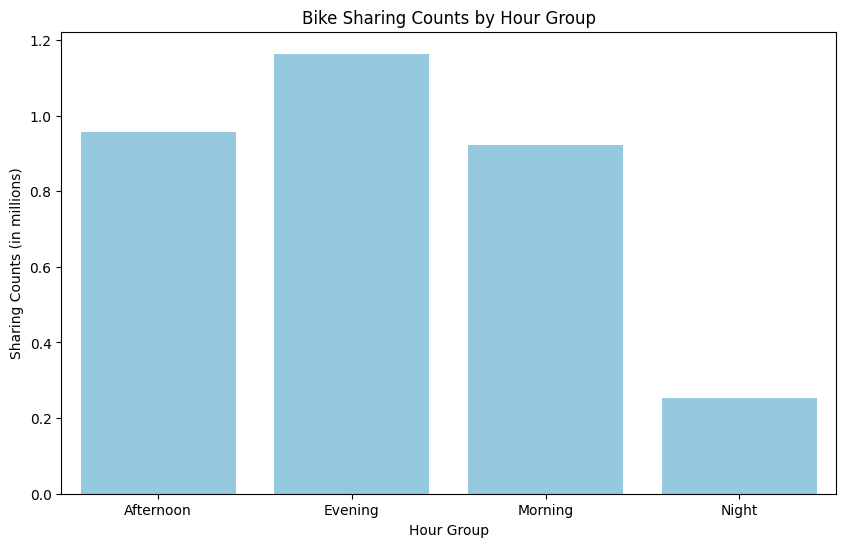

In [394]:
rentals_counts_by_hour = hour_df.groupby(by='hour_group', observed=False)['total_count'].sum()/ 1000000

plt.figure(figsize=(10, 6))
sns.barplot(data=rentals_counts_by_hour, color='skyblue')
plt.title('Bike Sharing Counts by Hour Group')
plt.xlabel('Hour Group')
plt.ylabel('Sharing Counts (in millions)')
plt.show()


Peminjaman sepeda pada kelompok jam malam lebih rendah dibandingkan dengan kelompok jam lainnya. Sedangkan peminjaman sepeda paling tinggi terjadi pada kelompok jam sore, diikuti oleh siang dan pagi.

## Conclusion

1. Bagaimana tren peminjaman sepeda per bulan pada tahun 2011 dan 2012?
2. Bagaimana pola peminjaman sepeda berdasarkan musim (season)?
3. Bagaimana korelasi antara cuaca (weathersit) dan jumlah peminjaman sepeda?
4. Bagaimana distribusi peminjaman sepeda untuk customer casual dan customer registered?
5. Bagaimana jumlah peminjaman pada pagi, siang, sore, dan malam hari?

- Conclusion Pertanyaan 1: Tren penyewaan sepeda sedikit berbeda antara tahun 2011 dan 2012. Pada tahun 2011, jumlah sewa sepeda terus meningkat sejak awal tahun, mencapai puncaknya pada bulan Juni, sebelum menurun secara bertahap menjelang akhir tahun. Pada tahun 2012, jumlah sewa sepeda juga terus meningkat sejak awal tahun hingga bulan September, diikuti dengan penurunan pada bulan-bulan berikutnya.

- Conclusion Pertanyaan 2: Terdapat pola tahunan yang konsisten dimana jumlah sewa sepeda cenderung meningkat dari musim panas sampai musim gugur, mencapai puncaknya pada musim gugur, sebelum menurun lagi pada musim dingin dan mencapai titik terendah pada musim semi. Pola ini terjadi pada tahun 2011 dan 2012.

- Conclusion Pertanyaan 3: Cuaca sangat mempengaruhi jumlah sewa sepeda. Cuaca cerah cenderung meningkatkan jumlah sewa, sedangkan kondisi cuaca buruk seperti hujan lebat atau salju menyebabkan penurunan jumlah sewa secara signifikan.

- Conclusion Pertanyaan 4: Mayoritas penyewaan sepeda berasal dari customer terdaftar (registered), baik pada tahun 2011 maupun 2012. Customer biasa (casual) berkontribusi lebih kecil dibandingkan customer registered.

- Conclusion Pertanyaan 5: Penyewaan sepeda paling banyak terjadi pada periode waktu `evening`, disusul pada `afternoon` dan `morning`. Penyewaan pada periode waktu `night` adalah yang terendah di antara semua periode waktu.

In [395]:
# all_df.to_csv("all_data.csv", index=False)